In [1]:
import subprocess 
from subprocess import PIPE
import rasterio
import json
import glob 
import pandas as pd
import os
import numpy as np
import cv2

In [2]:
# The local folder path where the labels are stored
path_labels = 'C:\\Users\\Dev Mehta\\OneDrive\\Desktop\\Dev\\FloodDetection\\Label'

# The local folder where the training images are stored
path_training_images = 'C:\\Users\\Dev Mehta\\OneDrive\\Desktop\\Dev\\FloodDetection\\images\\Source'

# The local folder where the testing images are stored
path_testing_images = 'C:\\Users\\Dev Mehta\\OneDrive\\Desktop\\Dev\\FloodDetection\\images\\Test'

In [3]:
imagelist = []
rootdir = path_training_images
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        imagelist.append(d)
        
        
print(f"The number of training samples is currently = {len(imagelist)}")
print(imagelist[0])

The number of training samples is currently = 1061
C:\Users\Dev Mehta\OneDrive\Desktop\Dev\FloodDetection\images\Source\source_0010_01_24


In [4]:
def image_label(product_id):
    
    json_data=open(path_labels+'\\'+product_id+'.geojson', "rb")
    jdata = json.load(json_data)
#     flood = jdata['properties']['FLOODING']
#     print(flood)

    if str(jdata['properties']['FLOODING']) == "False":
        image_label = 0
    else:
        image_label = 1
    
    return image_label

In [5]:
def load_data():
    
    data = [] 
    images = []
    labels = []
    
    for folder in imagelist:
        try:
            text=folder.split('\\')
            text1=text[-1].split('_')
#             print(text1)
            product_id='s2_'+text1[1]+'_2019_'+text1[2]+'_'+text1[3]
#             print(product_id+'\n')
            print(f"Processed {product_id} image")
            label = image_label(product_id)
#             print(label)
            # Open the img
            image = cv2.imread(folder + "\stack.tif")
#             print(image)
            # Append the image and its corresponding label to the output
            images.append(image)
            labels.append(label)
        except:
            pass
        
        
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
        
        
    data.append([images, labels])     

    return images, labels

In [6]:
train_images, train_labels = load_data()

Processed s2_0010_2019_01_24 image
Processed s2_0010_2019_01_29 image
Processed s2_0010_2019_02_03 image
Processed s2_0010_2019_02_08 image
Processed s2_0010_2019_12_25 image
Processed s2_0010_2019_12_30 image
Processed s2_0011_2019_01_09 image
Processed s2_0011_2019_01_14 image
Processed s2_0011_2019_01_19 image
Processed s2_0011_2019_01_24 image
Processed s2_0011_2019_01_29 image
Processed s2_0011_2019_02_03 image
Processed s2_0011_2019_02_08 image
Processed s2_0011_2019_12_25 image
Processed s2_0011_2019_12_30 image
Processed s2_0012_2019_01_09 image
Processed s2_0012_2019_01_14 image
Processed s2_0012_2019_01_19 image
Processed s2_0012_2019_01_24 image
Processed s2_0012_2019_01_29 image
Processed s2_0012_2019_02_03 image
Processed s2_0012_2019_02_08 image
Processed s2_0012_2019_12_25 image
Processed s2_0012_2019_12_30 image
Processed s2_0013_2019_01_09 image
Processed s2_0013_2019_01_14 image
Processed s2_0013_2019_01_19 image
Processed s2_0013_2019_01_24 image
Processed s2_0013_20

Processed s2_0082_2019_12_26 image
Processed s2_0082_2019_12_31 image
Processed s2_0084_2019_01_05 image
Processed s2_0084_2019_01_10 image
Processed s2_0084_2019_01_30 image
Processed s2_0084_2019_02_04 image
Processed s2_0084_2019_02_14 image
Processed s2_0084_2019_12_26 image
Processed s2_0084_2019_12_31 image
Processed s2_0085_2019_01_05 image
Processed s2_0085_2019_01_10 image
Processed s2_0085_2019_01_30 image
Processed s2_0085_2019_02_04 image
Processed s2_0085_2019_02_14 image
Processed s2_0085_2019_12_26 image
Processed s2_0085_2019_12_31 image
Processed s2_0086_2019_01_05 image
Processed s2_0086_2019_01_10 image
Processed s2_0086_2019_01_30 image
Processed s2_0086_2019_02_04 image
Processed s2_0086_2019_02_14 image
Processed s2_0086_2019_12_26 image
Processed s2_0086_2019_12_31 image
Processed s2_0088_2019_01_05 image
Processed s2_0088_2019_01_10 image
Processed s2_0088_2019_01_30 image
Processed s2_0088_2019_02_04 image
Processed s2_0088_2019_02_14 image
Processed s2_0088_20

Processed s2_0131_2019_01_23 image
Processed s2_0131_2019_12_16 image
Processed s2_0131_2019_12_19 image
Processed s2_0131_2019_12_26 image
Processed s2_0132_2019_01_05 image
Processed s2_0132_2019_01_10 image
Processed s2_0132_2019_01_13 image
Processed s2_0132_2019_01_15 image
Processed s2_0132_2019_01_18 image
Processed s2_0132_2019_01_23 image
Processed s2_0132_2019_12_16 image
Processed s2_0132_2019_12_19 image
Processed s2_0132_2019_12_26 image
Processed s2_0133_2019_01_05 image
Processed s2_0133_2019_01_10 image
Processed s2_0133_2019_01_13 image
Processed s2_0133_2019_01_15 image
Processed s2_0133_2019_01_18 image
Processed s2_0133_2019_01_23 image
Processed s2_0133_2019_12_16 image
Processed s2_0133_2019_12_19 image
Processed s2_0133_2019_12_26 image
Processed s2_0134_2019_01_05 image
Processed s2_0134_2019_01_10 image
Processed s2_0134_2019_01_13 image
Processed s2_0134_2019_01_15 image
Processed s2_0134_2019_01_18 image
Processed s2_0134_2019_01_23 image
Processed s2_0134_20

Processed s2_21_2019_04_19 image
Processed s2_21_2019_04_24 image
Processed s2_22_2019_02_02 image
Processed s2_22_2019_02_27 image
Processed s2_22_2019_03_29 image
Processed s2_22_2019_04_13 image
Processed s2_22_2019_04_18 image
Processed s2_23_2019_04_05 image
Processed s2_23_2019_04_10 image
Processed s2_23_2019_04_25 image
Processed s2_23_2019_05_20 image
Processed s2_24_2019_01_02 image
Processed s2_24_2019_02_01 image
Processed s2_24_2019_12_28 image
Processed s2_25_2019_04_05 image
Processed s2_25_2019_04_10 image
Processed s2_25_2019_04_25 image
Processed s2_25_2019_05_20 image
Processed s2_26_2019_01_02 image
Processed s2_26_2019_02_01 image
Processed s2_26_2019_12_28 image
Processed s2_27_2019_03_09 image
Processed s2_27_2019_03_17 image
Processed s2_27_2019_03_19 image
Processed s2_27_2019_03_22 image
Processed s2_27_2019_03_27 image
Processed s2_27_2019_04_08 image
Processed s2_27_2019_04_21 image
Processed s2_27_2019_04_23 image
Processed s2_28_2019_01_02 image
Processed 

Processed s2_62_2019_04_21 image
Processed s2_62_2019_04_23 image
Processed s2_63_2019_03_09 image
Processed s2_63_2019_03_12 image
Processed s2_63_2019_03_17 image
Processed s2_63_2019_03_19 image
Processed s2_63_2019_03_22 image
Processed s2_63_2019_03_27 image
Processed s2_63_2019_04_08 image
Processed s2_63_2019_04_21 image
Processed s2_63_2019_04_23 image
Processed s2_64_2019_03_02 image
Processed s2_64_2019_03_04 image
Processed s2_64_2019_03_07 image
Processed s2_64_2019_03_09 image
Processed s2_64_2019_03_12 image
Processed s2_64_2019_03_17 image
Processed s2_64_2019_03_19 image
Processed s2_64_2019_03_22 image
Processed s2_65_2019_03_09 image
Processed s2_65_2019_03_12 image
Processed s2_65_2019_03_17 image
Processed s2_65_2019_03_19 image
Processed s2_65_2019_03_22 image
Processed s2_65_2019_03_27 image
Processed s2_65_2019_04_08 image
Processed s2_65_2019_04_21 image
Processed s2_65_2019_04_23 image
Processed s2_66_2019_02_25 image
Processed s2_66_2019_03_02 image
Processed 

In [7]:
imagelist = []
rootdir = path_testing_images # define the path for the folder
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        imagelist.append(d)
        
        
print(f"The number of testing samples is = {len(imagelist)}")

The number of testing samples is = 128


In [8]:
test_images, test_labels = load_data()

Processed s2_0001_2019_01_02 image
Processed s2_0001_2019_01_12 image
Processed s2_0001_2019_01_17 image
Processed s2_0001_2019_01_22 image
Processed s2_0001_2019_01_27 image
Processed s2_0001_2019_02_01 image
Processed s2_0001_2019_02_06 image
Processed s2_0001_2019_12_18 image
Processed s2_0001_2019_12_23 image
Processed s2_0004_2019_01_04 image
Processed s2_0004_2019_01_06 image
Processed s2_0004_2019_01_14 image
Processed s2_0004_2019_01_16 image
Processed s2_0004_2019_12_15 image
Processed s2_0004_2019_12_17 image
Processed s2_0004_2019_12_20 image
Processed s2_0004_2019_12_22 image
Processed s2_0004_2019_12_30 image
Processed s2_0005_2019_01_04 image
Processed s2_0005_2019_01_06 image
Processed s2_0005_2019_01_14 image
Processed s2_0005_2019_01_16 image
Processed s2_0005_2019_12_15 image
Processed s2_0005_2019_12_17 image
Processed s2_0005_2019_12_20 image
Processed s2_0005_2019_12_22 image
Processed s2_0005_2019_12_30 image
Processed s2_0006_2019_01_04 image
Processed s2_0006_20

In [9]:
# Calculate the number of images in the test set 
# containing Flooded areas and the number of images that does not contain flooded areas

(unique, counts) = np.unique(test_labels, return_counts=True)

# print(unique, counts)
print(f"The number of images in the test dataset containing flooded areas is {counts[1]}\n")
print(f"While the number of images clean from floods is {counts[0]}")

The number of images in the test dataset containing flooded areas is 17

While the number of images clean from floods is 83


In [10]:
# Calculate the number of images in the training set 
# containing Flooded areas and the number of images that does not contain flooded areas

(unique, counts) = np.unique(train_labels, return_counts=True)

# print(unique, counts)
print(f"The number of images in the train dataset containing flooded areas is {counts[1]}\n")
print(f"While the number of images clean from floods is {counts[0]}")

The number of images in the train dataset containing flooded areas is 159

While the number of images clean from floods is 681


In [11]:
!pip install keras tensorflow matplotlib seaborn pydot


In [12]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model  # Use this for model visualization
# from keras.utils.vis_utils import plot_model  # You can use this if it works
import pydot
import tensorflow as tf
import cv2
import os
import numpy as np

# Now you can start writing your code below these import statements


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (512, 512, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, batch_size=28, epochs=20, validation_split = 0.2)

Epoch 1/20
24/24 [==============================] - 99s 4s/step - loss: 17.3870 - accuracy: 0.7381 - val_loss: 0.6427 - val_accuracy: 0.7976
Epoch 2/20
24/24 [==============================] - 92s 4s/step - loss: 0.3953 - accuracy: 0.8527 - val_loss: 0.6158 - val_accuracy: 0.7976
Epoch 3/20
24/24 [==============================] - 90s 4s/step - loss: 0.2914 - accuracy: 0.9003 - val_loss: 1.1970 - val_accuracy: 0.8036
Epoch 4/20
24/24 [==============================] - 90s 4s/step - loss: 0.2137 - accuracy: 0.9301 - val_loss: 1.3290 - val_accuracy: 0.7857
Epoch 5/20
24/24 [==============================] - 90s 4s/step - loss: 0.1587 - accuracy: 0.9449 - val_loss: 1.1654 - val_accuracy: 0.7738
Epoch 6/20
24/24 [==============================] - 89s 4s/step - loss: 0.1154 - accuracy: 0.9554 - val_loss: 1.3777 - val_accuracy: 0.7738
Epoch 7/20
24/24 [==============================] - 89s 4s/step - loss: 0.0990 - accuracy: 0.9598 - val_loss: 1.9242 - val_accuracy: 0.7679
Epoch 8/20
24/24 [=

In [16]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [17]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

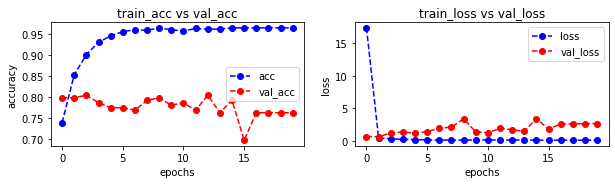

In [18]:
plot_accuracy_loss(history)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 508032)            0         
                                                                 
 dense (Dense)               (None, 128)               6

In [20]:
test_loss = model.evaluate(test_images, test_labels)

4/4 [==============================] - 2s 507ms/step - loss: 1.3188 - accuracy: 0.8200


In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [2]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

NameError: name 'train_images' is not defined

In [ ]:
# Save the features calculated earlier
np.save("train_features.npy", train_features)
np.save("test_features", test_features)

# Load the trained weights
# loaded_array = np.load("train_features.npy")
# loaded_array = np.load("test_features.npy")

In [ ]:
type(train_features)

In [ ]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [3]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=28, epochs=30, validation_split = 0.2)

NameError: name 'tf' is not defined

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model2.evaluate(test_features, test_labels)